# Analysis of SSW events on the Southern Hemisphere

In [1]:
import xarray as xr
import xarray.ufuncs as xrf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from matplotlib import colors

import sys

# appending a path
sys.path.append('/home/hochatmstud/bene/code/python-scripts/')

from definitions import *  # imports all functions from definitions.py which is located in the code-folder 'python-scripts'

xr.set_options(
    keep_attrs=True, display_style="html"
)  # Attributes of DataArrays will be kept through operations.
plt.rcParams["font.size"] = "22"


alt = [
    70,
    72,
    74,
    76,
    78,
    80,
    82,
    84,
    86,
    88,
    90,
    92,
    94,
    96,
    98,
    100,
    102,
    104,
    106,
    108,
    110,
    112,
    114,
    116,
    118,
    120,
]
root_path = "/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/"
#dir_path = "/home/hochatmstud/bene/"

In [2]:
station = "CMOR"

In [3]:
# Parameters
station = "Leipzig"


## Wind measurements

In [4]:
ds_wind = read_group("wind", station, root_path)

u = read_var(ds_wind, "u0")
v = read_var(ds_wind, "v0")

u_anomalie = anomalie("dayofyear", u)

v_anomalie = anomalie("dayofyear", v)


/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [5]:
analysis_start = "2019-08-09"
analysis_end = "2019-10-28"

upper_boundary = 101
lower_boundary = 77

### Zonal wind component

#### Climatology

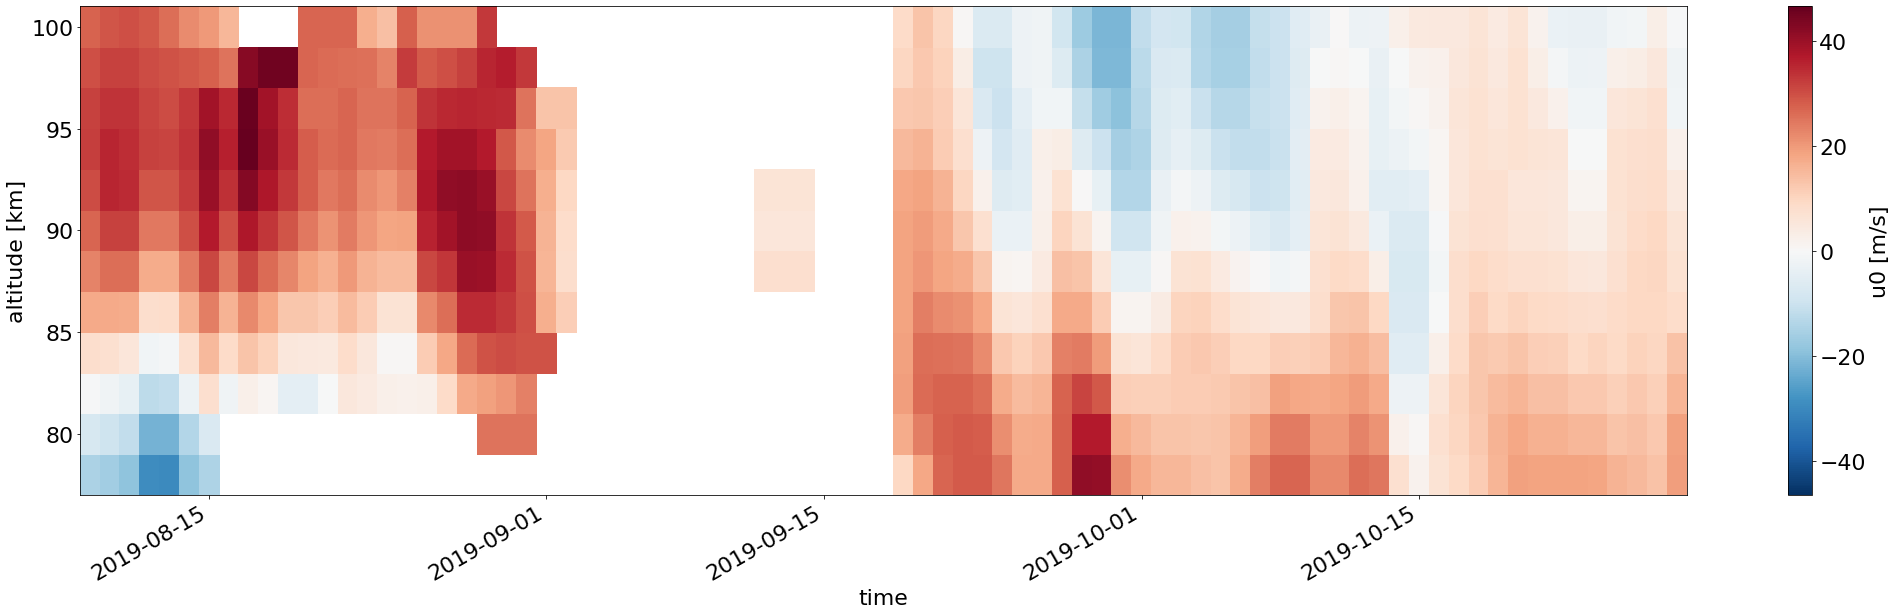

In [6]:
u.sel(time=slice(analysis_start, analysis_end),alt=slice(lower_boundary,upper_boundary)).plot(x='time',size=9,aspect=4)
plt.axvline(x='2019-09-18',color='white',linestyle='--',linewidth=4)

#### Anomalies

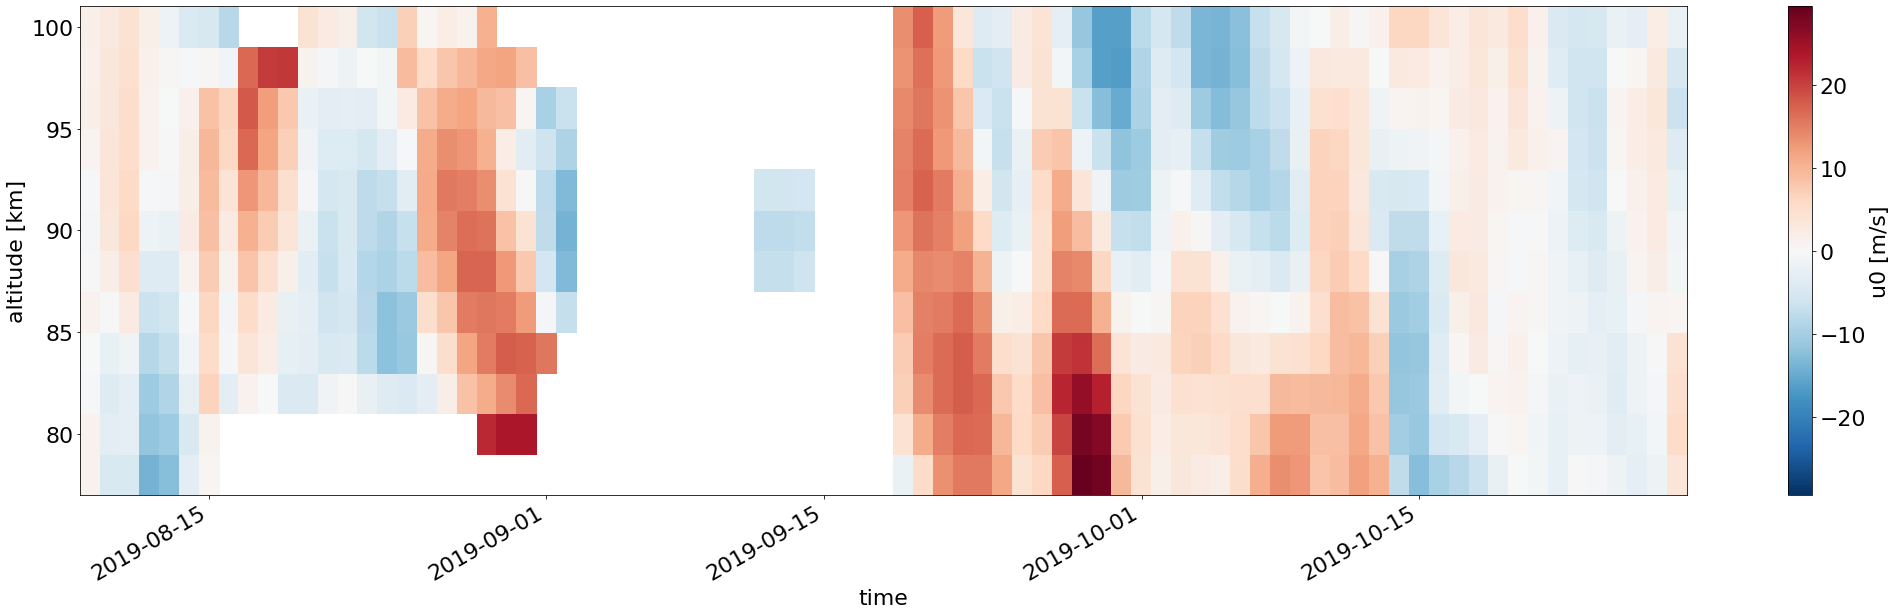

In [7]:
u_anomalie.sel(time=slice(analysis_start, analysis_end),alt=slice(lower_boundary,upper_boundary)).plot(x='time',size=9,aspect=4)
plt.axvline(x='2019-09-18',color='white',linestyle='--',linewidth=4)

### Meridional wind component

#### Climatology

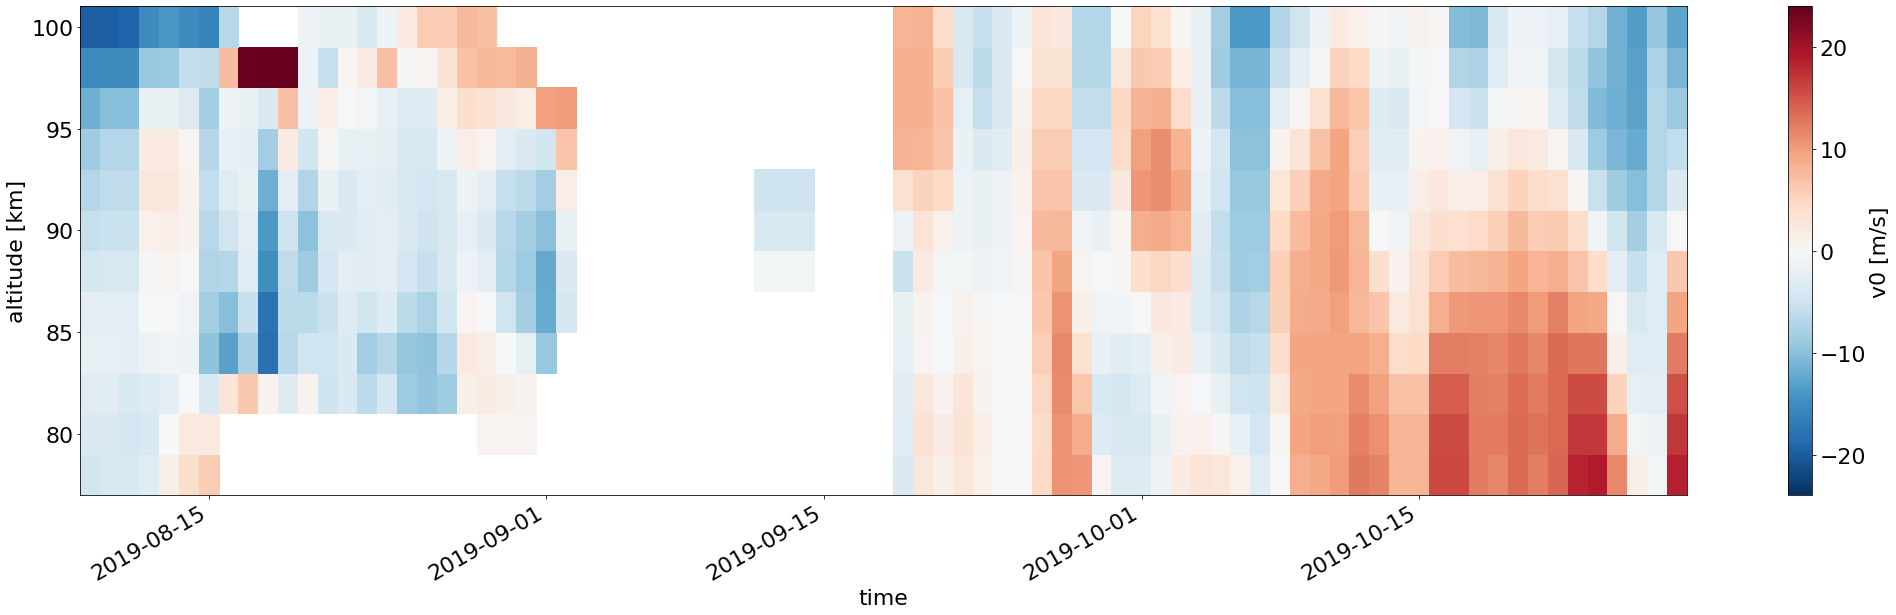

In [8]:
v.sel(time=slice(analysis_start, analysis_end),alt=slice(lower_boundary,upper_boundary)).plot(x='time',size=9,aspect=4)
plt.axvline(x='2019-09-18',color='white',linestyle='--',linewidth=4)

#### Anomalies

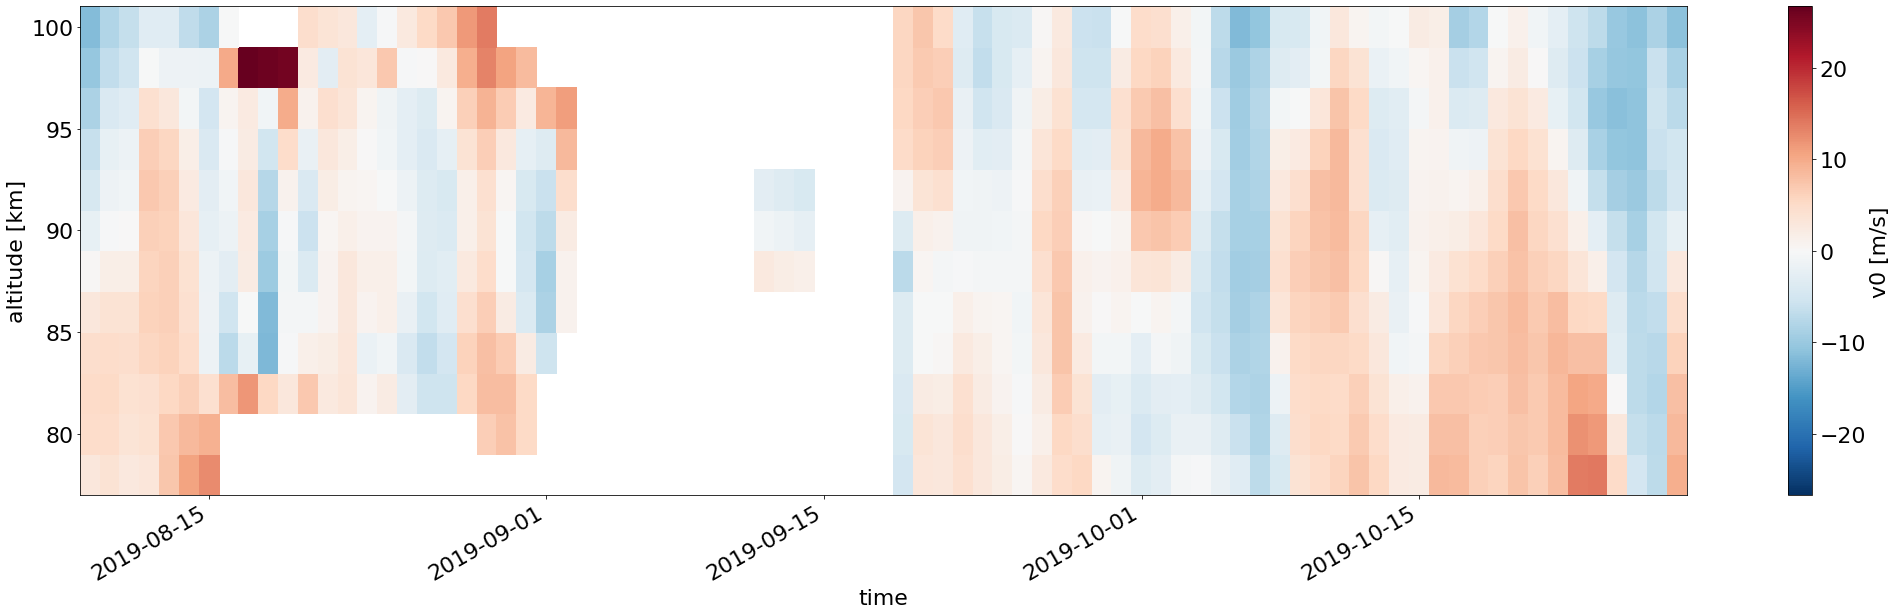

In [9]:
v_anomalie.sel(time=slice(analysis_start, analysis_end),alt=slice(lower_boundary,upper_boundary)).plot(x='time',size=9,aspect=4)
plt.axvline(x='2019-09-18',color='white',linestyle='--',linewidth=4)

## Wave estimates

In [10]:
ds_waves = read_group("waves", station, root_path)
gw = read_var(ds_waves, "GW")
pw = read_var(ds_waves, "PW")

if station == "Sodankyla_Kiruna":
    gw = gw.sel(time=slice("2008", "2020"))
    pw = pw.sel(time=slice("2008", "2020"))

gw_anomalie = anomalie("dayofyear", gw)

pw_anomalie = anomalie("dayofyear", pw)

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


### Gravity waves

#### Gravity wave activity

##### Climatology

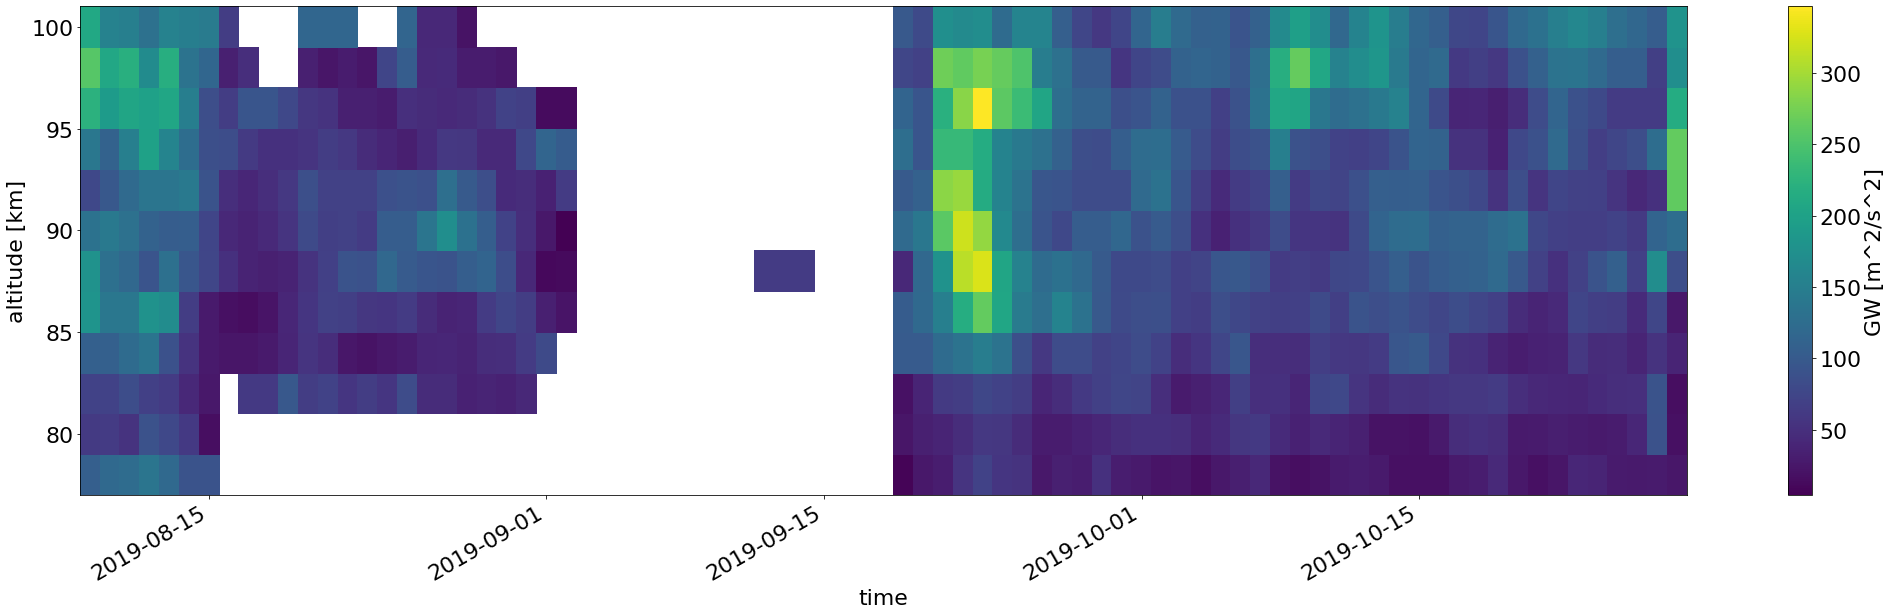

In [11]:
gw.sel(time=slice(analysis_start, analysis_end),alt=slice(lower_boundary,upper_boundary)).plot(x='time',size=9,aspect=4)
plt.axvline(x='2019-09-18',color='white',linestyle='--',linewidth=4)

##### Anomalies

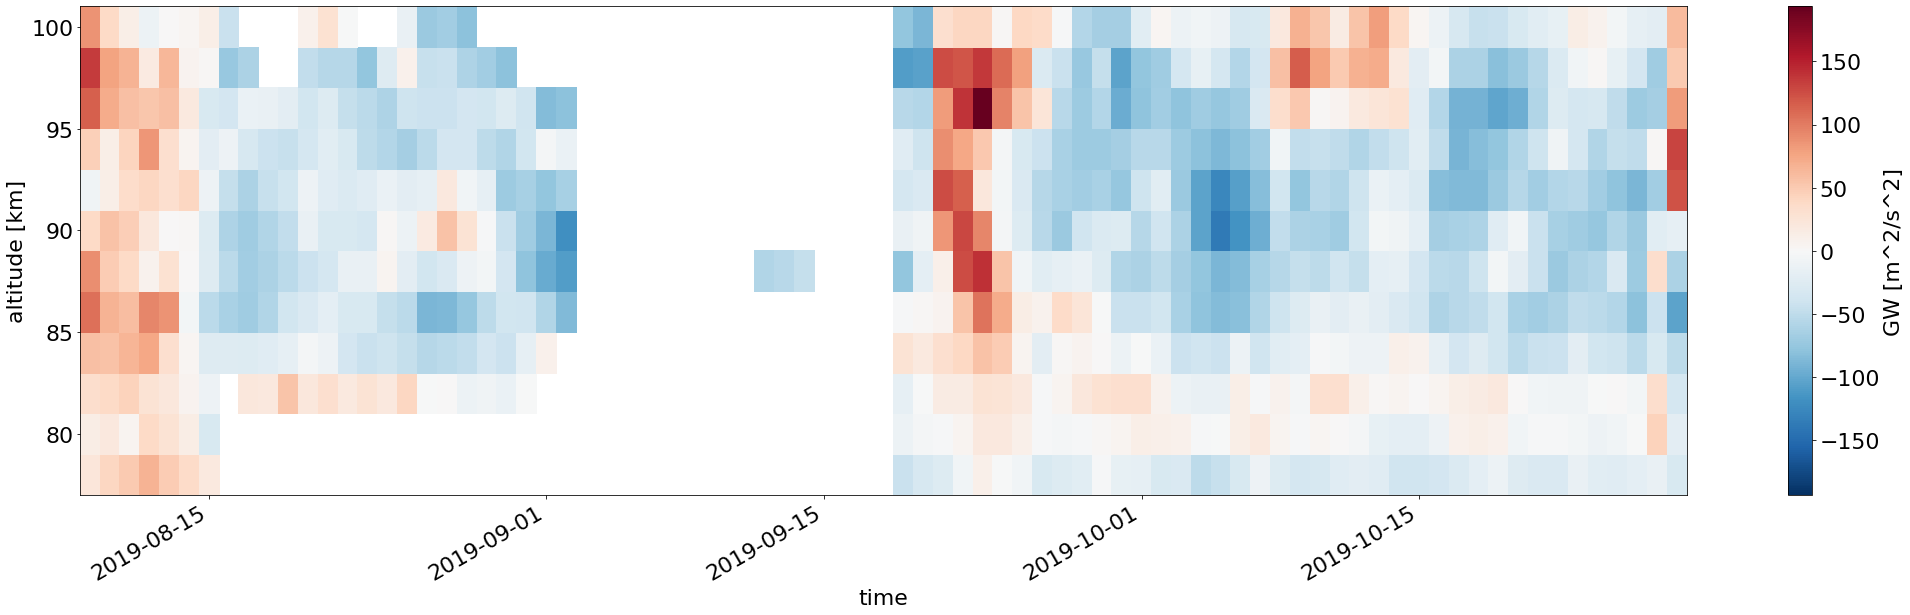

In [12]:
gw_anomalie.sel(time=slice(analysis_start, analysis_end),alt=slice(lower_boundary,upper_boundary)).plot(x='time',size=9,aspect=4)
plt.axvline(x='2019-09-18',color='white',linestyle='--',linewidth=4)

#### Gravity wave drag

In [13]:
station_name = station

directory = glob.glob(f"{root_path}GWD*_{station}.nc")[0]

ds = xr.open_dataset(directory)

gwd = ds["GWD"]

if station == "Sodankyla_Kiruna":
    gwd = gwd.sel(time=slice("2008", "2021"))

gwd_anomalie = anomalie("dayofyear", gwd)

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


##### Climatology

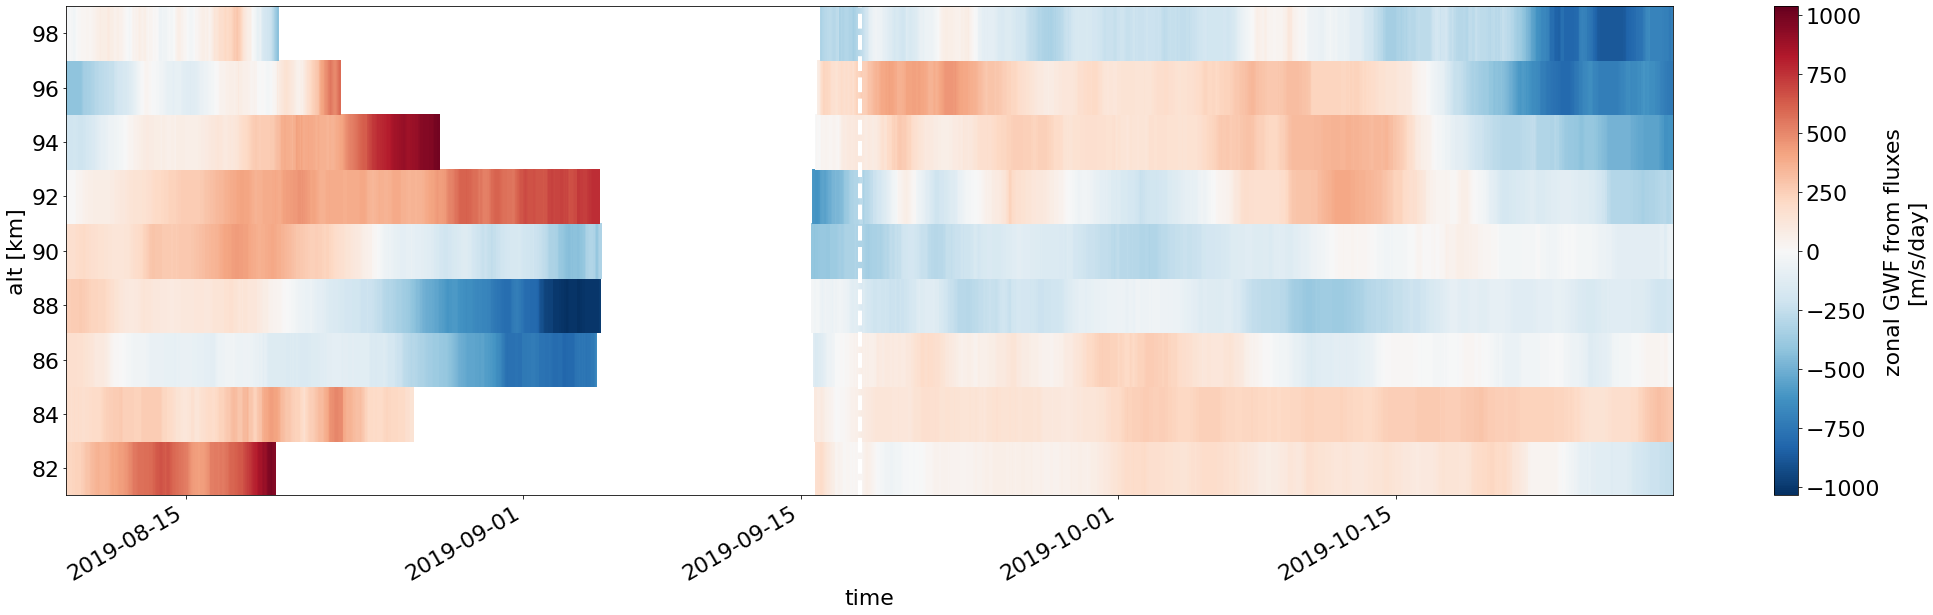

In [14]:
gwd.sel(time=slice(analysis_start, analysis_end),alt=slice(82,98)).plot(x='time',size=9,aspect=4)
plt.axvline(x='2019-09-18',color='white',linestyle='--',linewidth=4)

##### Anomalies

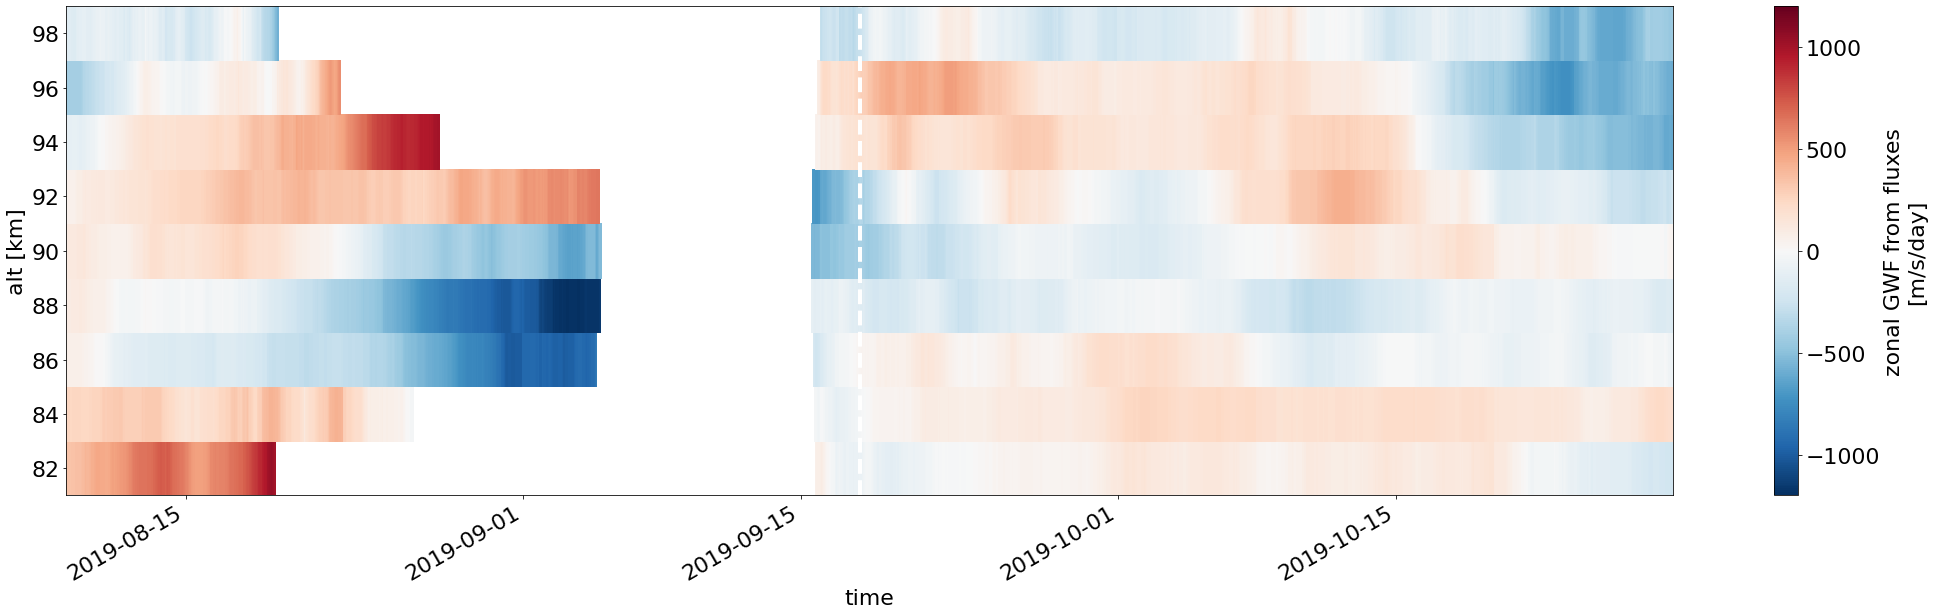

In [15]:
gwd_anomalie.sel(time=slice(analysis_start, analysis_end),alt=slice(82,98)).plot(x='time',size=9,aspect=4)
plt.axvline(x='2019-09-18',color='white',linestyle='--',linewidth=4)

### Planetary waves

#### Climatology

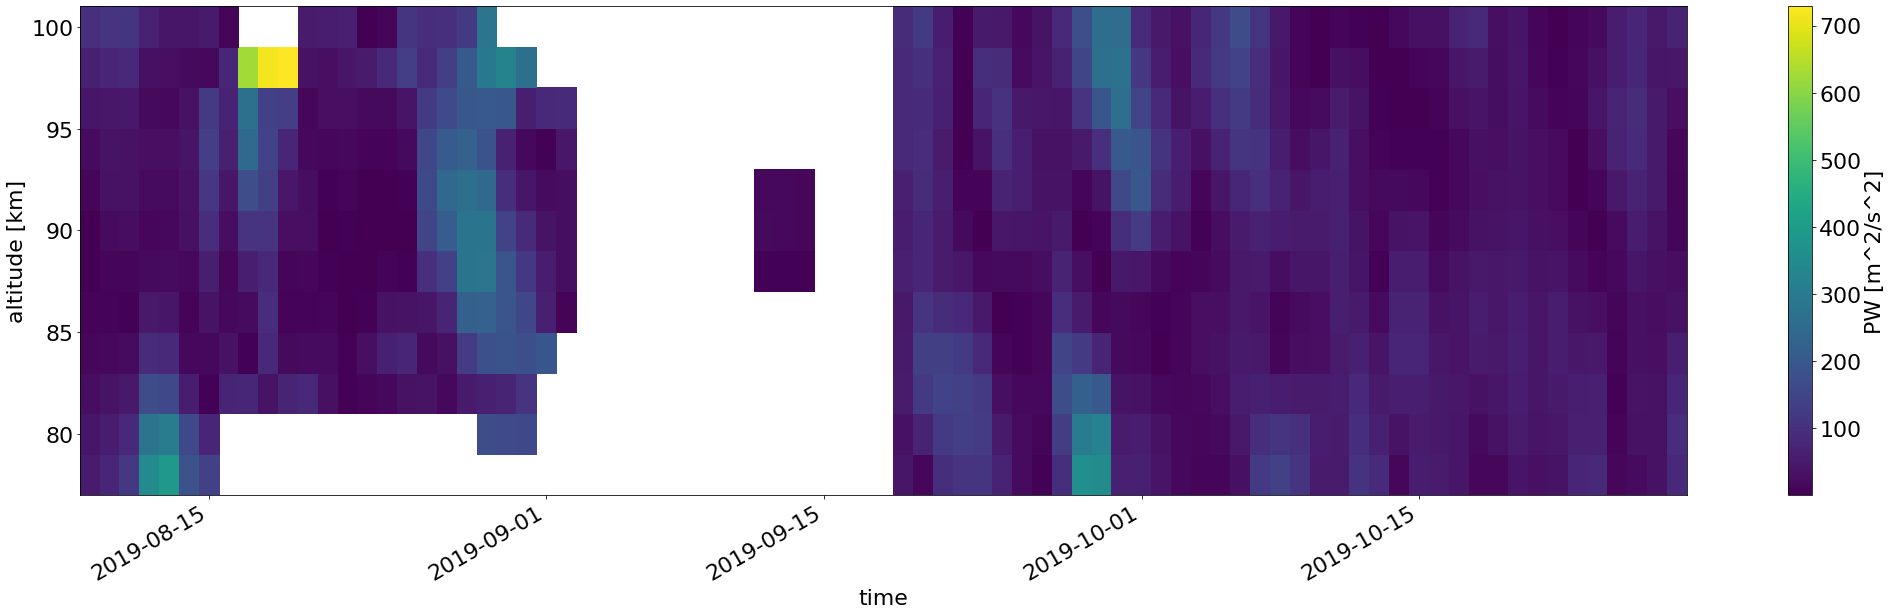

In [16]:
pw.sel(time=slice(analysis_start, analysis_end),alt=slice(lower_boundary,upper_boundary)).plot(x='time',size=9,aspect=4)
plt.axvline(x='2019-09-18',color='white',linestyle='--',linewidth=4)

#### Anomalies

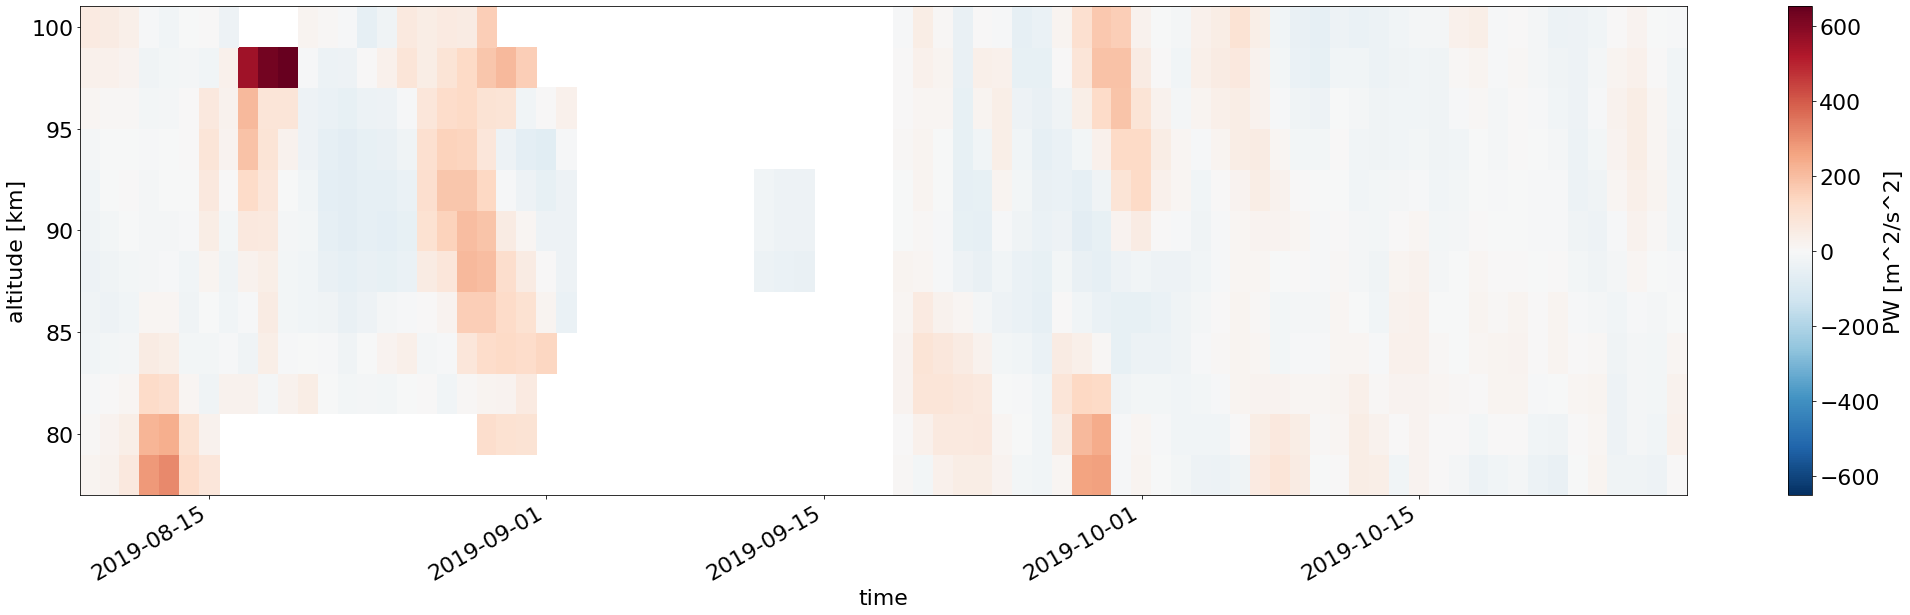

In [17]:
pw_anomalie.sel(time=slice(analysis_start, analysis_end),alt=slice(lower_boundary,upper_boundary)).plot(x='time',size=9,aspect=4)
plt.axvline(x='2019-09-18',color='white',linestyle='--',linewidth=4)